# Exploratory Data Analysis

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
pd.set_option("Display.max_rows", None)

In [24]:
training_data=pd.read_csv("/ds_project/Titanic_MachineLearning_from_Disaster/titanic/traindata__.csv")
training_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,numeric_ticket,ticket_letters
0,0,3,"Braund, Mr. Owen Harris",male,0.275000,1,0,A/5 21171,0.014151,S,0,a5
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.475000,1,0,PC 17599,0.139136,C,0,pc
2,1,3,"Heikkinen, Miss. Laina",female,0.325000,0,0,STON/O2. 3101282,0.015469,S,0,stono2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.437500,1,0,113803,0.103644,S,1,0
4,0,3,"Allen, Mr. William Henry",male,0.437500,0,0,373450,0.015713,S,1,0
5,0,3,"Moran, Mr. James",male,0.350000,0,0,330877,0.016510,Q,1,0
6,0,1,"McCarthy, Mr. Timothy J",male,0.675000,0,0,17463,0.101229,S,1,0
7,0,3,"Palsson, Master. Gosta Leonard",male,0.025000,3,1,349909,0.041136,S,1,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.337500,0,2,347742,0.021731,S,1,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.175000,1,0,237736,0.058694,C,1,0


## Let's see what kind of data types we have in the dataset

In [25]:
training_data.dtypes.to_frame()

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object


## The variables are categorized into numerical and categorical variables. 

In [26]:
train_num=training_data[['Age','Fare']]
train_categ=training_data[['Survived','Pclass','Sex','numeric_ticket','ticket_letters', 'Embarked','SibSp','Parch']]

## Lets check of how data are distributed in numerical variables.

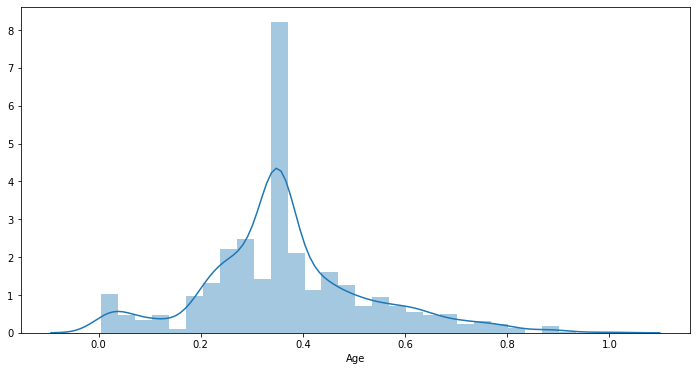

In [27]:
f, ax=plt.subplots(figsize=(12,6))
sns.distplot(train_num.Age)

## Age variable seems roughly bell curved and can be assumed it is normally distributed.

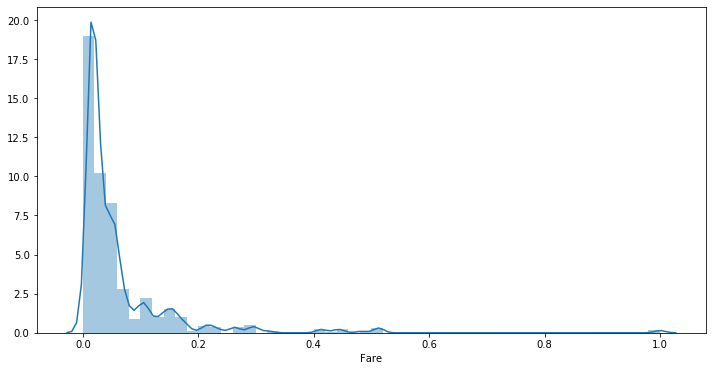

In [28]:
plt.subplots(figsize=(12,6))
sns.distplot(train_num.Fare)

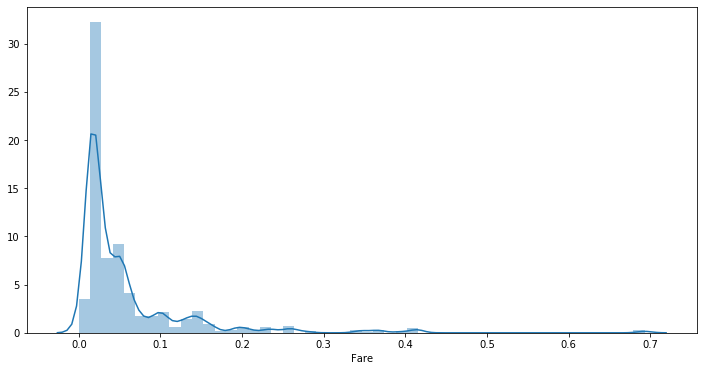

In [29]:
fare_norm=np.log1p(train_num.Fare)
plt.subplots(figsize=(12,6))
sns.distplot(fare_norm)

## Let's drop Name variable as I see it has no relevant relation in predicting survivals of the passengers.

In [30]:
training_data.drop(['Name'], axis=1, inplace=True)
training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,numeric_ticket,ticket_letters
0,0,3,male,0.2750,1,0,A/5 21171,0.014151,S,0,a5
1,1,1,female,0.4750,1,0,PC 17599,0.139136,C,0,pc
2,1,3,female,0.3250,0,0,STON/O2. 3101282,0.015469,S,0,stono2
3,1,1,female,0.4375,1,0,113803,0.103644,S,1,0
4,0,3,male,0.4375,0,0,373450,0.015713,S,1,0


## Using the barplot, we cans see how the catigorical variables are distributed.

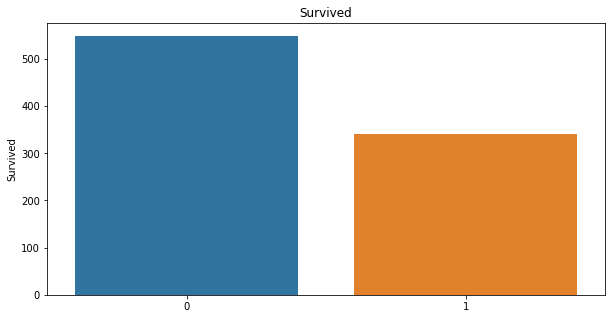

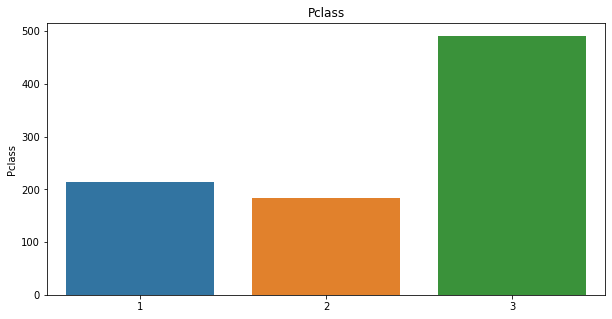

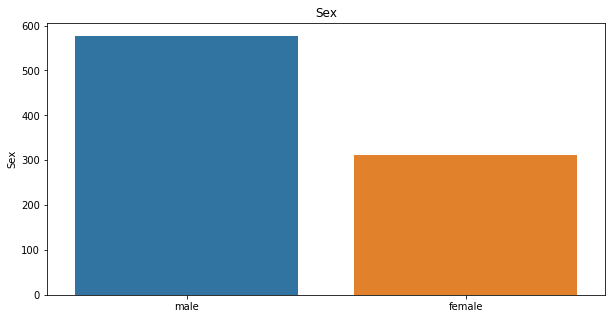

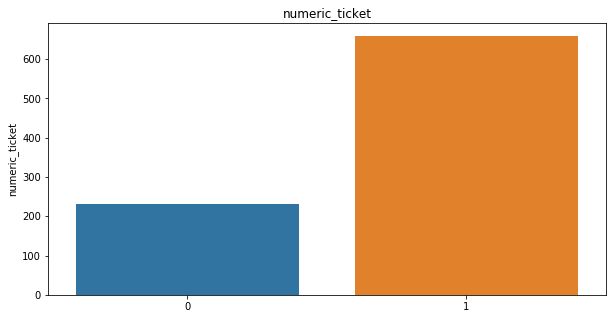

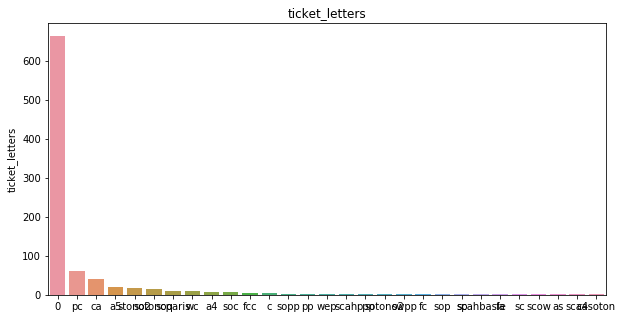

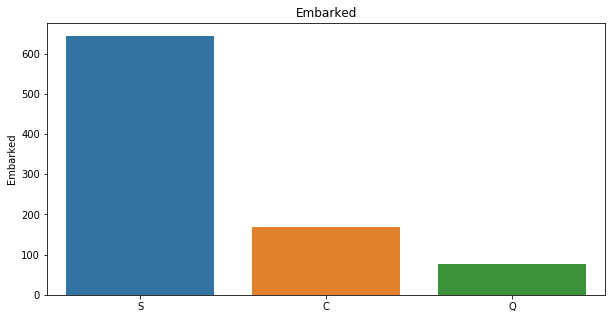

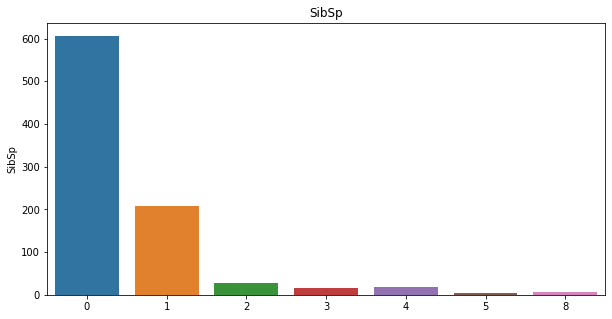

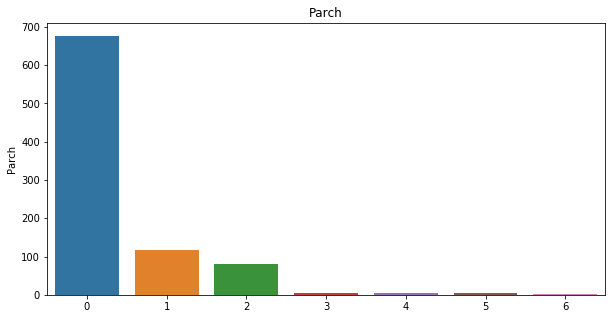

In [31]:
for category in train_categ.columns:
    plt.subplots(figsize=(10,5))
    sns.barplot(train_categ[category].value_counts().index, train_categ[category].value_counts()).set_title(category)
    plt.show()

In [32]:
#train_num=training_data[['Age','SibSp','Parch','Fare']]
#train_categ=training_data[['Survived','Pclass','Sex','Ticket']]

## Groupby method helps to group the variables and derive the meaningful information. In the following information, we can see proportion of male and female who have lived and died due to the crash of the ship.

In [33]:
training_data.groupby(['Sex'])['Survived'].value_counts().to_frame()

Survived
Sex    Survived          
female 1              231
       0               81
male   0              468
       1              109

## We can see the numbers of the survivals based on age. 

In [34]:
training_data.groupby(['Age'])['Survived'].value_counts().to_frame()

Survived
Age      Survived          
0.005250 1                1
0.008375 1                1
0.009375 1                2
0.010375 1                2
0.011500 1                1
0.012500 1                5
         0                2
0.025000 0                7
         1                3
0.037500 1                5
         0                1
0.050000 1                7
         0                3
0.062500 1                4
0.075000 1                2
         0                1
0.087500 0                2
         1                1
0.100000 0                2
         1                2
0.112500 0                6
         1                2
0.125000 0                2
0.137500 0                3
         1                1
0.150000 1                1
0.162500 1                2
0.175000 0                3
         1                3
0.181250 0                1
0.187500 1                4
         0                1
0.200000 0               11
         1                6
0.212500 0                7
         1                6
0.225000 0               17
         1                9
0.237500 0               16
         1                9
0.250000 0               12
         1                3
0.256250 0                1
0.262500 0               19
         1                5
0.275000 0               16
         1               11
0.287500 0               10
         1                5
0.293750 0                1
0.300000 0               15
         1               15
0.306250 0                1
0.312500 0               17
         1                6
0.325000 0               12
         1                6
0.337500 1               11
         0                7
0.350000 0              143
         1               59
0.356250 0                2
0.362500 0               12
         1                8
0.375000 0               15
         1               10
0.381250 0                2
0.387500 0                9
         1                8
0.400000 0                9
         1                9
0.406250 0                1
         1                1
0.412500 0                9
         1                6
0.425000 0                9
         1                6
0.431250 0                1
0.437500 1               11
         0                7
0.450000 0               11
         1               11
0.456250 0                1
0.462500 0                5
         1                1
0.475000 0                6
         1                4
0.487500 0                9
         1                5
0.500000 0                7
         1                6
0.506250 0                2
0.512500 0                4
         1                2
0.525000 0                7
         1                6
0.537500 0                4
         1                1
0.550000 0                6
         1                3
0.562500 0                7
         1                5
0.568750 0                2
0.575000 0                3
0.587500 0                8
         1                1
0.600000 1                6
         0                3
0.612500 1                4
         0                2
0.625000 0                5
         1                5
0.637500 0                5
         1                2
0.650000 0                3
         1                3
0.662500 1                1
0.675000 0                5
         1                3
0.687500 0                1
         1                1
0.693750 0                1
0.700000 0                2
         1                2
0.712500 0                2
0.725000 1                3
         0                2
0.737500 0                2
0.750000 0                2
         1                2
0.762500 0                3
0.775000 0                2
         1                1
0.787500 1                2
0.800000 0                2
0.812500 0                3
0.825000 0                1
0.875000 0                2
0.881250 0                1
0.887500 0                2
0.925000 0                1
1.000000 1     

## We cans see the numbers of survivals based on having the numbers of Siblings and Spouse. 

In [35]:
training_data.groupby(['SibSp'])['Survived'].value_counts().to_frame()

Survived
SibSp Survived          
0     0              398
      1              208
1     1              112
      0               97
2     0               15
      1               13
3     0               12
      1                4
4     0               15
      1                3
5     0                5
8     0                7

## We cans see the numbers of survivals based on port of embarkation. 

In [36]:
training_data.groupby(['Embarked'])['Survived'].value_counts().to_frame()

Survived
Embarked Survived          
C        1               93
         0               75
Q        0               47
         1               30
S        0              427
         1              217

## We cans see the numbers of survivals based on letters on the ticket. 

In [37]:
training_data.groupby(['ticket_letters'])['Survived'].value_counts().to_frame()

Survived
ticket_letters Survived          
0              0              410
               1              253
a4             0                7
a5             0               19
               1                2
as             0                1
c              0                3
               1                2
ca             0               27
               1               14
casoton        0                1
fa             0                1
fc             0                1
fcc            1                4
               0                1
pc             1               39
               0               21
pp             1                2
               0                1
ppp            0                1
               1                1
sc             1                1
sca4           0                1
scah           0                1
               1                1
scahbasle      1                1
scow           0                1
scparis        0                6
               1                5
soc            0                5
               1                1
sop            0                1
sopp           0                3
sotono2        0                2
sotonoq        0               13
               1                2
sp             0                1
stono2         0               10
               1                8
swpp           1                2
wc             0                9
               1                1
wep            0                2
               1                1

In [38]:
training_data.groupby(['numeric_ticket'])['Survived'].value_counts().to_frame()

Survived
numeric_ticket Survived          
0              0              142
               1               88
1              0              407
               1              252

## Let's see the visualization of the numbers of the survivals based on fare they paid, grouped into sex; male and female. 

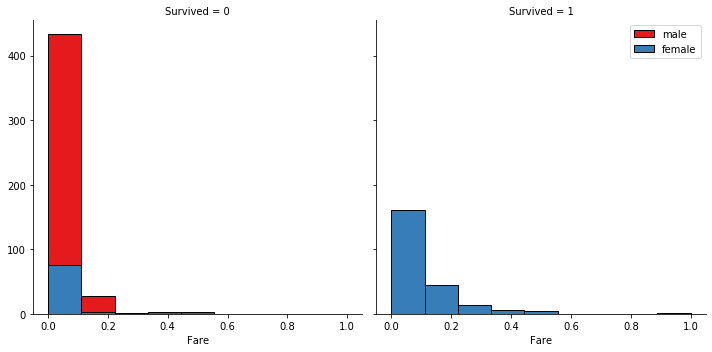

In [39]:
bins = np.linspace(training_data.Fare.min(), training_data.Fare.max(), 10)
g = sns.FacetGrid(training_data, col="Survived", hue="Sex", palette="Set1", col_wrap=2, height=5)
g.map(plt.hist, 'Fare', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Let's see the visualization of the numbers of the survivals based on the passenger's age, grouped into sex; male and female. 

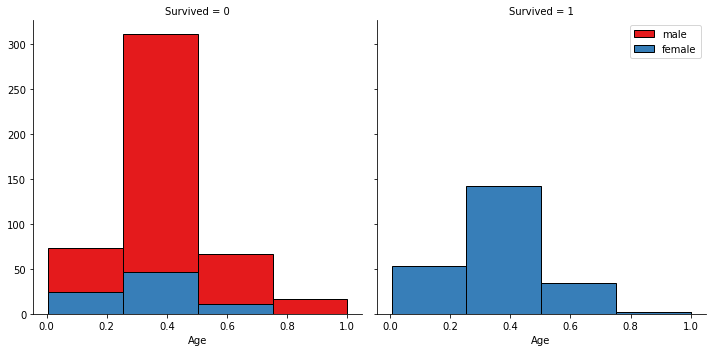

In [40]:
bins = np.linspace(training_data.Age.min(), training_data.Age.max(), 5)
g = sns.FacetGrid(training_data, col="Survived", hue="Sex", palette="Set1", col_wrap=2, height=5)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Let's see the visualization of the numbers of the survivals based on the numbers of the passenger's siblings and the spouse, grouped into sex; male and female. 

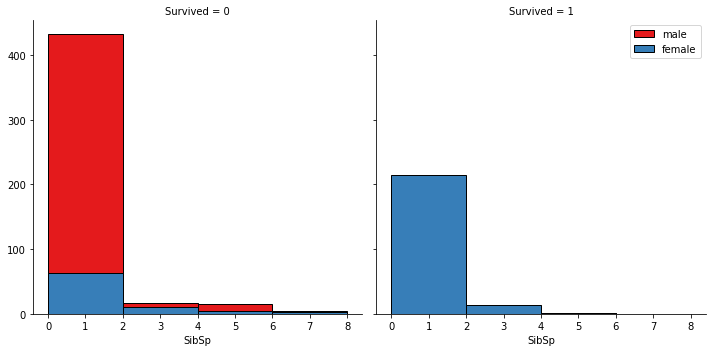

In [41]:
bins = np.linspace(training_data.SibSp.min(), training_data.SibSp.max(), 5)
g = sns.FacetGrid(training_data, col="Survived", hue="Sex", palette="Set1", col_wrap=2, height=5)
g.map(plt.hist, 'SibSp', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Let's see the visualization of the numbers of the survivals based on the numbers of the parents and children information, grouped into sex; male and female. 

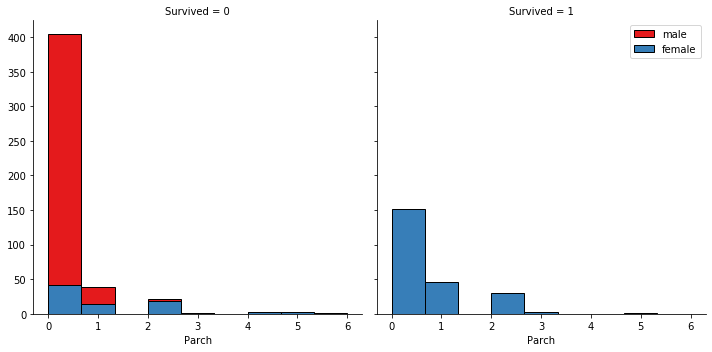

In [42]:
bins = np.linspace(training_data.Parch.min(), training_data.Parch.max(), 10)
g = sns.FacetGrid(training_data, col="Survived", hue="Sex", palette="Set1", col_wrap=2, height=5)
g.map(plt.hist, 'Parch', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Let's see the visualization of the numbers of the survivals based on Age, grouped into ports of Embarkation. 

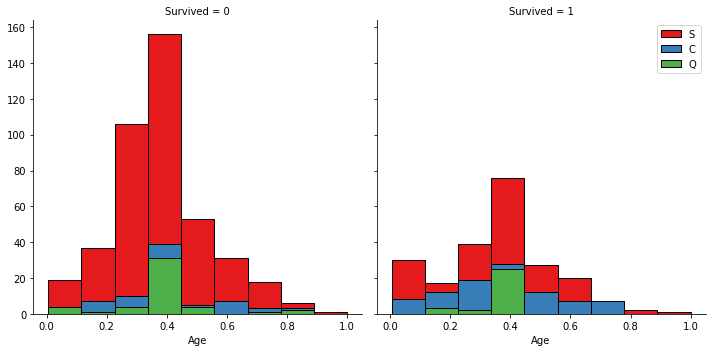

In [43]:
bins = np.linspace(training_data.Age.min(), training_data.Age.max(), 10)
g = sns.FacetGrid(training_data, col="Survived", hue="Embarked", palette="Set1", col_wrap=2, height=5)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Let's see the visualization of the numbers of the survivals based on the passenger's age, grouped into ticket class;Upper (1) , Middle (2) and Lower (3). 

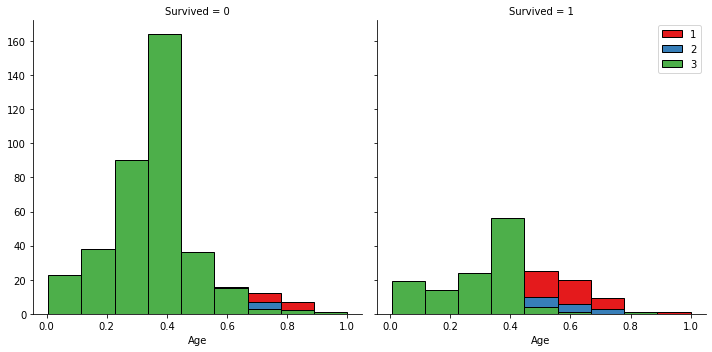

In [44]:
bins=np.linspace(training_data.Age.min(), training_data.Age.max(),10)
g=sns.FacetGrid(training_data, col='Survived', hue='Pclass', palette='Set1', col_wrap=2, height=5)
g.map(plt.hist, 'Age', bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

## We can see the age level of the passengers spending on the tickets, grouped into sex; male and female. The female group had spended more on the tickets, which is more than $ 100.

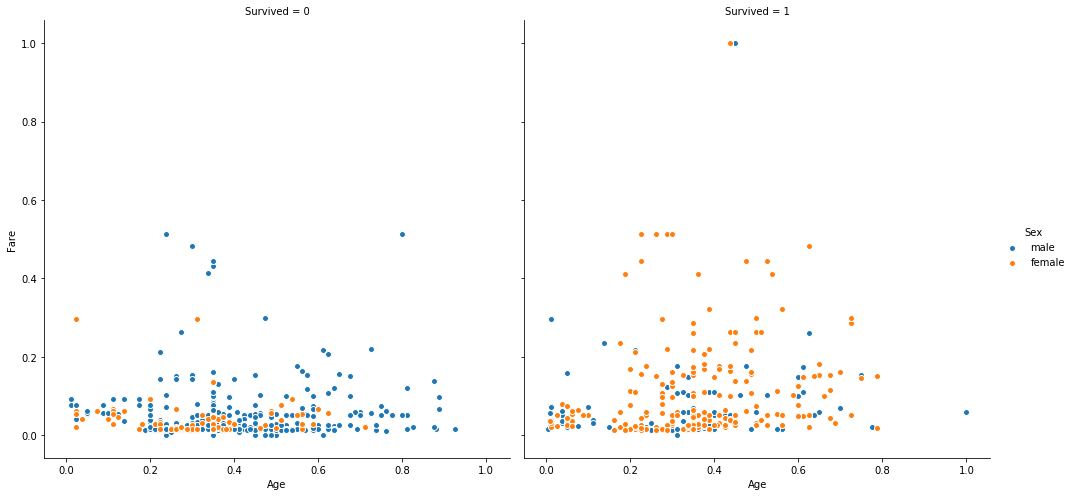

In [45]:
g=sns.FacetGrid(training_data, col="Survived",  hue="Sex", height=7)
g.map(plt.scatter, "Age", "Fare" , edgecolor="w").add_legend()

## The following pivot table gives information on the survival of the numbers of male and female based on ticket class.

In [46]:
table1=pd.pivot_table(training_data,columns=['Survived'], values='Fare',index=['Pclass', 'Sex'], aggfunc="count")
table1

Survived         0   1
Pclass Sex            
1      female    3  89
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

## Here, we can see the more numbers of the passengers (male) boarded from port S have died in comparison to other ports. 

In [47]:
table3=pd.pivot_table(training_data, values='Fare', columns=['Survived'], index=['Embarked','Sex'], aggfunc="count")
table3

Survived           0    1
Embarked Sex             
C        female    9   64
         male     66   29
Q        female    9   27
         male     38    3
S        female   63  140
         male    364   77

## Let's see the statistical summaries of the dataset

In [48]:
training_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,numeric_ticket
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.366439,0.524184,0.382452,0.062649,0.741282
std,0.486260,0.834700,0.162312,1.103705,0.806761,0.097003,0.438177
min,0.000000,1.000000,0.005250,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.275000,0.000000,0.000000,0.015412,0.000000
50%,0.000000,3.000000,0.350000,0.000000,0.000000,0.028213,1.000000
75%,1.000000,3.000000,0.437500,1.000000,0.000000,0.060508,1.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000,1.000000


## Let's see how all the variables are correlated

In [49]:
training_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,numeric_ticket
Survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290,-0.000190
Pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193,0.082100
Age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707,-0.032265
SibSp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887,-0.080189
Parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532,-0.035156
Fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000,-0.174698
numeric_ticket,-0.000190,0.082100,-0.032265,-0.080189,-0.035156,-0.174698,1.000000


## Heatmap provides visualization of the correlation between the variables. 

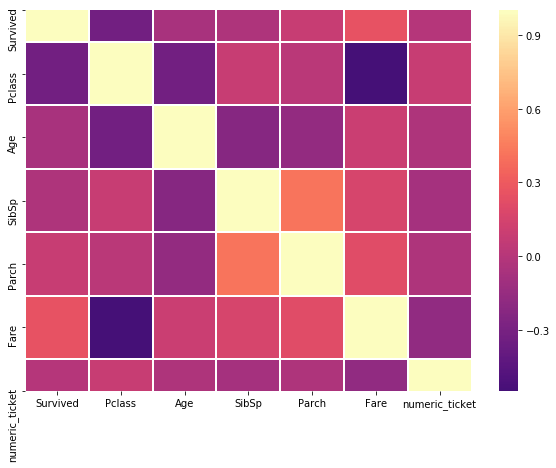

In [50]:
plt.subplots(figsize=(10,7))
sns.heatmap(training_data.corr(), cmap='magma',cbar=True,center=0, linewidth=1)

In [51]:
training_data.to_csv("train_data_eda.csv", index=0)